<h1> How Important is Height and Weight in Staying Healthy in the NBA ? </h1>
<h2> Matthew Verhey </h2>
<h3> https://github.com/m-vrhy/cosc3570 </h3>

![Bol and Bogues](https://imagesvc.timeincapp.com/v3/mm/image?url=https%3A%2F%2Fcdn-s3.si.com%2Fs3fs-public%2Fimages%2FManute-Bol-Muggsy-Bogues.jpg&w=370&q=85)
[Source](https://www.si.com/nba/photos/2014/10/08/nbas-tallest-and-shortest-together#1)

In [1]:
from datascience import *
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<h3> Injuries data set is a dataset of all NBA injuries from 2010 to 2017  [Link](https://www.kaggle.com/ghopkins/nba-injuries-2010-2018)</h3>
<h5> The injuries listed are those in which a player missed a game. </h5>

In [2]:
injuries = Table.read_table('injuries.csv')
injuries

Date,Team,Acquired,Relinquised,Notes
2010-10-03,Bulls,nan,Carlos Boozer,fractured bone in right pinky finger (out indefinitely)
2010-10-06,Pistons,nan,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2010-10-06,Pistons,nan,Terrico White,broken fifth metatarsal in right foot (out indefinitely)
2010-10-08,Blazers,nan,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely)
2010-10-08,Nets,nan,Troy Murphy,strained lower back (out indefinitely)
2010-10-08,Pistons,nan,Jonas Jerebko,surgery to repair torn right Achilles tendon
2010-10-08,Pistons,nan,Terrico White,surgery on right foot to repair broken fifth metatarsal
2010-10-09,Nuggets,nan,Al Harrington,partially torn plantar fascia in left foot (out indefini ...
2010-10-12,Bucks,nan,Darington Hobson,surgery on left hip (out for season)
2010-10-12,Kings,nan,Samuel Dalembert,strained left groin (out indefinitely)


In [3]:
#Drop unnecessary data and relabel columns to be more readable
injuries = injuries.drop('Acquired')
injuries = injuries.relabel('Relinquised', 'Name')

<h3>Player info dataset is a data set of all NBA players. [Link](https://www.kaggle.com/sandey/nba-players-information)</h3>
<h5>Here, we are interested in the height and weight data </h5> 

In [4]:
player_info = Table.read_table('playersInfo.csv')
player_info

Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
alaa abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
zaid abdul aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
kareem abdul jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
mahmoud abdul rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
tariq abdul wahad,1998,2003,F,6-6,223,"November 3, 1974","University of Michigan, San Jose State University"
shareef abdur rahim,1997,2008,F,6-9,225,"December 11, 1976",University of California
tom abernethy,1977,1981,F,6-7,220,"May 6, 1954",Indiana University
forest able,1957,1957,G,6-3,180,"July 27, 1932",Western Kentucky University
john abramovic,1947,1948,F,6-3,195,"February 9, 1919",Salem International University
alex abrines,2017,2018,G-F,6-6,190,"August 1, 1993",nan


In [5]:
#Cleaning of the player info data set
player_info = player_info.where('To', are.below_or_equal_to(2018))
player_info = player_info.where('From', are.above_or_equal_to(1991))
player_info.append_column('Name', player_info.apply(lambda x: x.title() , 'Player'))#capitalizes the names
player_info.move_to_start('Name')
player_info.drop('Player', 'Birth Date', 'Colleges')

Name,From,To,Pos,Ht,Wt
Alaa Abdelnaby,1991,1995,F-C,6-10,240
Mahmoud Abdul Rauf,1991,2001,G,6-1,162
Tariq Abdul Wahad,1998,2003,F,6-6,223
Shareef Abdur Rahim,1997,2008,F,6-9,225
Alex Abrines,2017,2018,G-F,6-6,190
Alex Acker,2006,2009,G,6-5,185
Quincy Acy,2013,2018,F,6-7,240
Hassan Adams,2007,2009,G,6-4,220
Jordan Adams,2015,2016,G,6-5,209
Steven Adams,2014,2018,C,7-0,255


In [6]:
injuries

Date,Team,Name,Notes
2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out indefinitely)
2010-10-06,Pistons,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out indefinitely)
2010-10-08,Blazers,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely)
2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)
2010-10-08,Pistons,Jonas Jerebko,surgery to repair torn right Achilles tendon
2010-10-08,Pistons,Terrico White,surgery on right foot to repair broken fifth metatarsal
2010-10-09,Nuggets,Al Harrington,partially torn plantar fascia in left foot (out indefini ...
2010-10-12,Bucks,Darington Hobson,surgery on left hip (out for season)
2010-10-12,Kings,Samuel Dalembert,strained left groin (out indefinitely)


In [7]:
# Using loops, I create a list of players whose names appeared in both the injured players dataset
# as well as the player info dataset. This way, we can see the heights and weights of the players
# in the injured data set.

names = player_info.column('Name')
inj = injuries.column('Name')

injuredplayers = []

count = 0

for i in range(len(inj)):
    for j in range(len(names)):
        if names[j] == inj[i]:
            injuredplayers.append(names[j])

In [8]:
injuredplayers = list(set(injuredplayers))#get rid of duplicate name entries

h = player_info.column('Ht')
w = player_info.column('Wt')
p = player_info.column('Pos')

#Lists to be used in the final dataset
ht = [ ]
wt = [ ]
pos = [ ]

#Loops through the list of names, extracting data on height, weight, and position
for i in range(len(injuredplayers)): 
    for j in range(len(names)):
        if injuredplayers[i] == names[j]:
            ht.append(h[j])
            wt.append(w[j])
            pos.append(p[j])
            

In [9]:
#Create the final dataset with all relevant information
final = Table().with_column('Name', injuredplayers, 'Height', ht, 'Weight', wt, 'Position', pos)
final

Name,Height,Weight,Position
Demetrius Jackson,6-1,201,G
Darius Morris,6-4,190,G
Josh Smith,6-9,225,F
Danny Granger,6-9,222,F
Dennis Schroder,6-1,172,G
Rudy Gobert,7-1,245,C
Kendall Marshall,6-4,200,G
Rasheed Wallace,6-10,225,F-C
Randy Foye,6-4,213,G
Lorenzo Brown,6-5,189,G


In [10]:
# Height in inches is much easier to visualize and interpret, so here we create a new column
# in our dataset for height in inches
height_inches = [ ]
for height in final.column('Height'):
    H_feet = height.split("-")[0]
    H_inch = height.split("-")[1].split("\"")[0]
    height = int(H_feet) * 12 + int(H_inch)
    height_inches.append(height)
    
final.append_column('Height (in.)' , height_inches)
final

Name,Height,Weight,Position,Height (in.)
Demetrius Jackson,6-1,201,G,73
Darius Morris,6-4,190,G,76
Josh Smith,6-9,225,F,81
Danny Granger,6-9,222,F,81
Dennis Schroder,6-1,172,G,73
Rudy Gobert,7-1,245,C,85
Kendall Marshall,6-4,200,G,76
Rasheed Wallace,6-10,225,F-C,82
Randy Foye,6-4,213,G,76
Lorenzo Brown,6-5,189,G,77


In [11]:
#More data cleaning to categorize players into three distinct positions
def position_changer(pos):
        if str(pos) == "C-F":
            return "C"
        if str(pos) == "F-C":
            return "F"  
        if str(pos) == "F-G":
            return "F"
        if str(pos) == "G-F":
            return "G"
        else: 
            return pos
        
final.drop('Position')#drop the old position data   
final.append_column('Position', final.apply(position_changer, 'Position'))#replace it with simplified list
final

Name,Height,Weight,Position,Height (in.)
Demetrius Jackson,6-1,201,G,73
Darius Morris,6-4,190,G,76
Josh Smith,6-9,225,F,81
Danny Granger,6-9,222,F,81
Dennis Schroder,6-1,172,G,73
Rudy Gobert,7-1,245,C,85
Kendall Marshall,6-4,200,G,76
Rasheed Wallace,6-10,225,F,82
Randy Foye,6-4,213,G,76
Lorenzo Brown,6-5,189,G,77


In [12]:
#Calculate the means for various data types
mean_height_in = final.column('Height (in.)').mean().round()
mean_height_ft = mean_height_in/12
mean_weight = final.column('Weight').mean()
print("Injured player mean height in inches: " + str(mean_height_in.round(2)) + '\n' +
      "Injured player mean height in feet: " + str(mean_height_ft.round(2)) + '\n' +
      "Injured player mean weight in lbs.: " + str(mean_weight.round(2)))
mean_height_cm = mean_height_in * 2.54
mean_weight_kg = mean_weight/2.205
print('Injured player mean height in cm: ' + str(mean_height_cm.round(2)) + '\n' +
      'Injured player mean weight in kg: ' + str(mean_weight_kg.round(2)))

Injured player mean height in inches: 79.0
Injured player mean height in feet: 6.58
Injured player mean weight in lbs.: 221.68
Injured player mean height in cm: 200.66
Injured player mean weight in kg: 100.54


Compare this to Chad Starkey's findings from "Injuries and Illnesses in the National Basketball Association" written in 2000, 
* Of the 3843 player entires, 728 (18.9%) players were listed as centers, 1565 (40.7%) as forwards and 1550 (40.3%) as guards.
* Mean height (cm) : 200.8
* Mean weight (kg) : 100.2

<h2> Visualizations </h2>

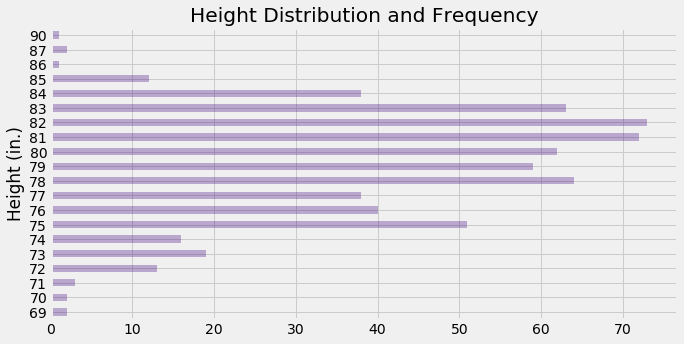

In [13]:
#First visualization shows the distribution of height across the dataset of injured players
height_frequency = final.group('Height (in.)')
height_frequency = pd.DataFrame(height_frequency.to_array())
height_frequency.plot(alpha = .3,figsize=(10,5),grid = True,kind = 'barh', x='Height (in.)', y = 'count', legend=False, colormap='Purples_r', title='Height Distribution and Frequency')

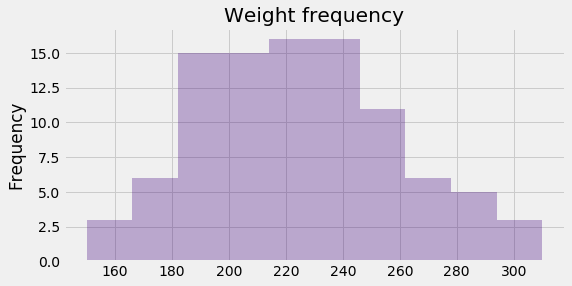

In [14]:
#Second visualization shows the distribution of weight
weight_frequency = final.group('Weight')
weight_frequency = pd.DataFrame(weight_frequency.to_array())
weight_frequency.plot(alpha = .3, grid=True,title = 'Weight frequency',kind = 'hist', x='count', y = 'Weight', figsize=(8,4), colormap='Purples_r', legend=False)


In [15]:
#write and read data as a checkpoint 
final_data = final.to_csv('final_data.csv')
data_frame = pd.read_csv('final_data.csv')


<h3>Small multiples for height and weight distributions per position</h3>

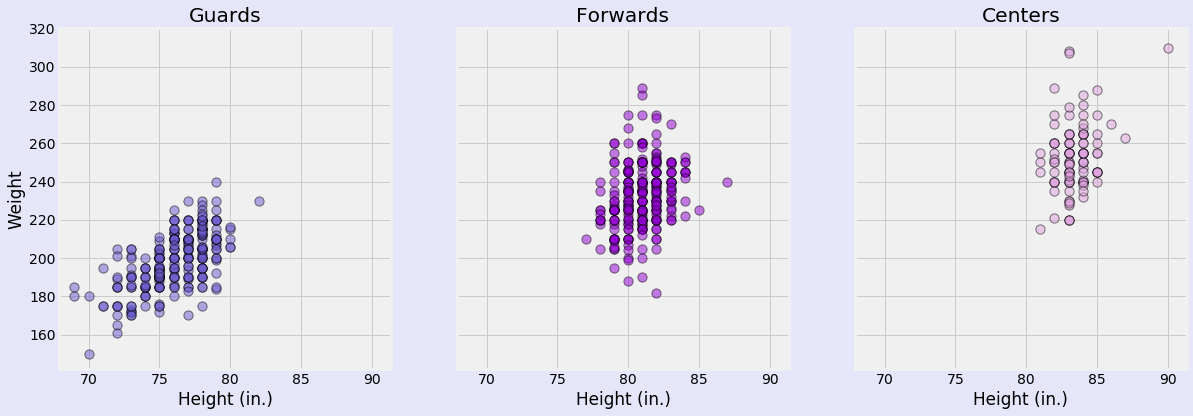

In [16]:
#Visualize a small multiple scatter plot of the heights and weights of injured players per position
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5.85), sharex = True, sharey = True, facecolor = 'lavender')
data_frame[data_frame['Position'] == 'G'].plot(title = 'Guards', color = 'slateblue', kind = 'scatter', x = 'Height (in.)', y = 'Weight',ax = ax1, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)
data_frame[data_frame['Position'] == 'F'].plot(title = 'Forwards', color = 'darkviolet', kind = 'scatter', x = 'Height (in.)', y = 'Weight',ax = ax2, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)
data_frame[data_frame['Position'] == 'C'].plot(title = 'Centers', color = 'plum', kind = 'scatter', x = 'Height (in.)', y = 'Weight',ax = ax3, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)


<h4>Scatter plot height and weight distributions for all positions</h4>

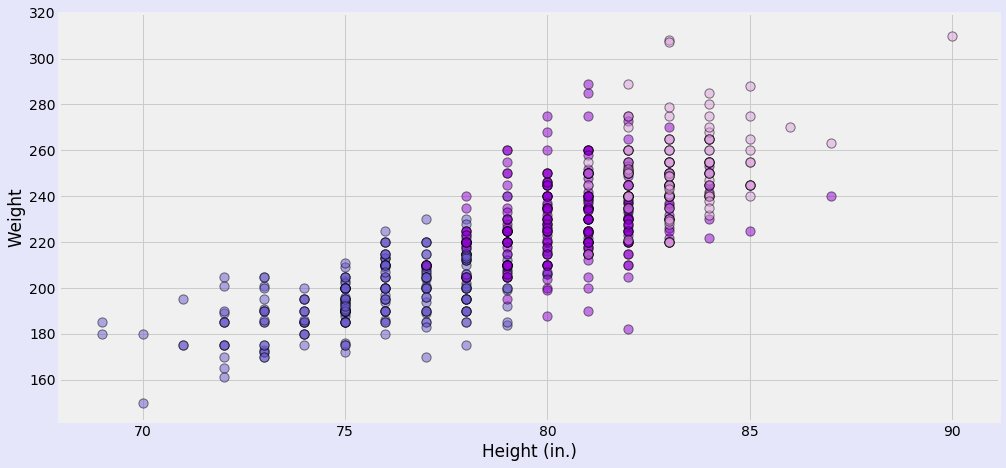

In [17]:
#Combine injured player scatter plot with overlayed scatters with different colors
fig_comb, ax = plt.subplots(sharex=True, sharey=True, figsize = (15,7), facecolor = 'lavender')
data_frame[data_frame['Position'] == 'G'].plot(kind = 'scatter', color = 'slateblue', x = 'Height (in.)', y = 'Weight',ax = ax, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)
data_frame[data_frame['Position'] == 'F'].plot(kind = 'scatter', color = 'darkviolet', x = 'Height (in.)', y = 'Weight',ax = ax, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)
data_frame[data_frame['Position'] == 'C'].plot(kind = 'scatter', color = 'plum', x = 'Height (in.)', y = 'Weight', ax = ax, legend = False, alpha = .5, s=85, edgecolors = 'black', linewidth = 1)


In [18]:
#Counts the number of injuries per position
guard_count = data_frame[data_frame['Position'] == 'G'].count()
guard_count = guard_count.Name
forward_count = data_frame[data_frame['Position'] == 'F'].count()
forward_count = forward_count.Name
center_count = data_frame[data_frame['Position'] == 'C'].count()
center_count = center_count.Name

In [19]:
#Creates columns for counts and percentage of positions
pos_col = ['Guard', 'Forward', 'Center']
pos_counts = [guard_count, forward_count, center_count]
total_counts = guard_count + forward_count + center_count
pos_percentage = [(guard_count/total_counts)*100, (forward_count/total_counts)*100, (center_count/total_counts)*100]
position_data = Table().with_columns('Position', pos_col, 'Counts', pos_counts, 'Percentage', pos_percentage)

position_data

Position,Counts,Percentage
Guard,267,42.3138
Forward,264,41.8384
Center,100,15.8479


In [20]:
#Calculate the mean heights and weights of players per position
guards_dataframe = data_frame[data_frame['Position'] == 'G']
guards_dataframe.columns = [ 'Name','Height', 'Weight', 'Position', 'Inches']
mean_guard_height = guards_dataframe.Inches.mean()
mean_guard_weight = guards_dataframe.Weight.mean()

forwards_dataframe = data_frame[data_frame['Position'] == 'F']
forwards_dataframe.columns = [ 'Name','Height', 'Weight', 'Position', 'Inches']
mean_forward_height = forwards_dataframe.Inches.mean()
mean_forward_weight = forwards_dataframe.Weight.mean()

centers_dataframe = data_frame[data_frame['Position'] == 'C']
centers_dataframe.columns = [ 'Name','Height', 'Weight', 'Position', 'Inches']
mean_center_height = centers_dataframe.Inches.mean()
mean_center_weight = centers_dataframe.Weight.mean()

mean_heights = [mean_guard_height, mean_forward_height, mean_center_height]
mean_weights = [mean_guard_weight, mean_forward_weight, mean_center_weight]

position_data = position_data.with_columns('Mean Height', mean_heights, 'Mean Weight', mean_weights)
position_data

Position,Counts,Percentage,Mean Height,Mean Weight
Guard,267,42.3138,76.0375,199.142
Forward,264,41.8384,80.9394,232.598
Center,100,15.8479,83.41,253.06
